In [2]:
pip install -U graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U pydot pydotplus pydot-ng

Note: you may need to restart the kernel to use updated packages.


In [4]:
import sys
import os
from time import time
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.tree import (DecisionTreeClassifier,DecisionTreeRegressor, export_graphviz)
from sklearn.linear_model import LinearRegression
import graphviz
import matplotlib.image as mpig

In [5]:
inpDir = os.path.join('..', '..', 'input')

# set location of inputs for this module
moduleDir = 'machine_learning'

# set location of output files
outDir = os.path.join('..', 'output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.1
N_SAMPLES = 1000
ALPHA= 0.001


# parameters for Matplotlib
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }

CMAP = plt.cm.rainbow
plt.rcParams.update(params)
plt.set_cmap(CMAP)

plt.style.use('seaborn-v0_8-darkgrid')
TEST_SIZE = 0.25

<Figure size 1500x500 with 0 Axes>

## HELPER FUNCTION


In [7]:
##helper function
def fn_plot_decision_boundary(clf,X1,y1,ax=None):
    '''
    Args:
        clf:classifier
        X1: np.ndarray - Feature matrix
        y1 : np.ndarray - labels/targets
        ax: matplotlib axis object
    Return:
        None
    '''
    #make sure matplotlib axis exists
    if ax is None:
        ax= plt.gca()

    #generate grid for contours
    dm = 0.05 #grid spacing

    x_min, x_max = X1[:,0].min()-0.5, X1[:,0].max()+0.5 # Col 1

    y_min, y_max = X1[:,1].min()-0.5, X1[:,1].max()+0.5 # Col 2

    # Create a meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))

    # Stack them
    XX = np.c_[xx.ravel(), yy.ravel()]

    # Make Predictions
    y_pred = clf.predict(XX)

    # Assign predictions to be respect point
    Z = y_pred.reshape(xx.shape)

    ax.contourf(xx,yy, Z, alpha=0.6, cmap=CMAP)
    ax.scatter(X1[:,0], X1[:,1], c=y1,s=20, edgecolor='k', cmap=CMAP)
    return

## DATA

In [9]:
X,y = make_blobs(n_samples=600, centers=4, random_state=0, cluster_std=0.6)
X.shape, y.shape

((600, 2), (600,))

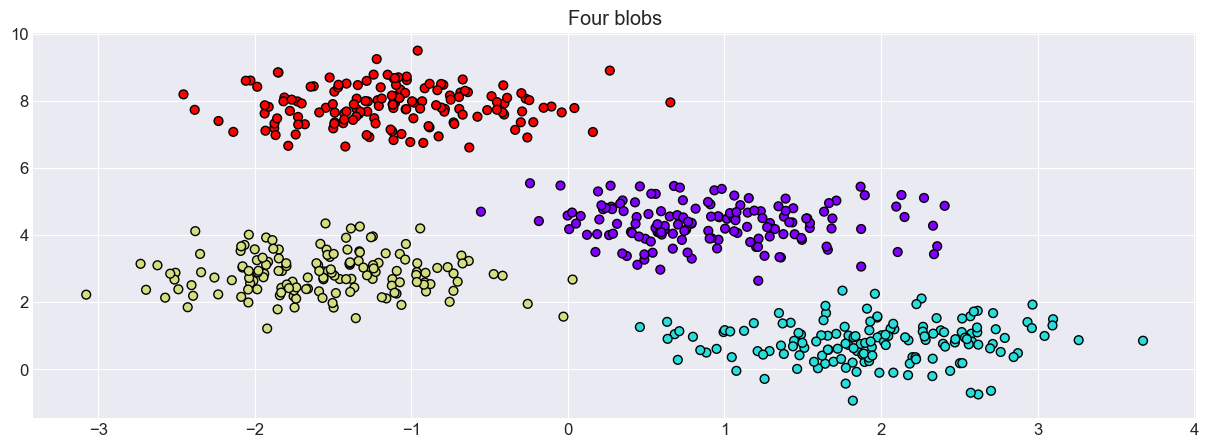

In [10]:
fig, ax= plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y, s=40, cmap=CMAP, edgecolors='k')
ax.set_title('Four blobs')
plt.show()

In [11]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [12]:
clf =DecisionTreeClassifier(max_depth = 10)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=10)

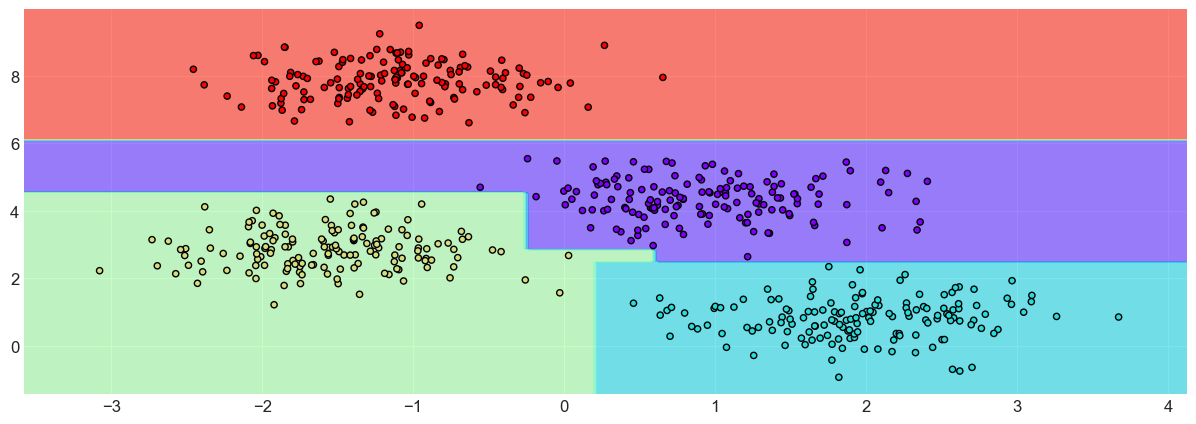

In [13]:
fn_plot_decision_boundary(clf, X,y)

In [14]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [16]:
X_train , X_test, y_train, y_test= train_test_split(data.data,
                                                    data.target,
                                                    test_size=TEST_SIZE,
                                                    stratify=data.target,
                                                    random_state=RANDOM_STATE)

In [17]:
tree = DecisionTreeClassifier(random_state=RANDOM_STATE)

In [18]:
tree.fit(X_train,y_train)

print(f'Train set accuracy: {tree.score(X_train, y_train): 0.4f}')
print(f'Train set accuracy: {tree.score(X_test, y_test): 0.4f}')

Train set accuracy:  1.0000
Train set accuracy:  0.8951


In [19]:
tree = DecisionTreeClassifier(max_depth=2,random_state=RANDOM_STATE)

In [20]:
tree.fit(X_train,y_train)

print(f'Train set accuracy: {tree.score(X_train, y_train): 0.4f}')
print(f'Train set accuracy: {tree.score(X_test, y_test): 0.4f}')

Train set accuracy:  0.9742
Train set accuracy:  0.9091


In [21]:
export_graphviz(tree, out_file='tree.dot',class_names=['M','B'], feature_names=data.feature_names, impurity=False, filled=True)

'dot-Tpng' is not recognized as an internal or external command,
operable program or batch file.


NameError: name 'mpimg' is not defined

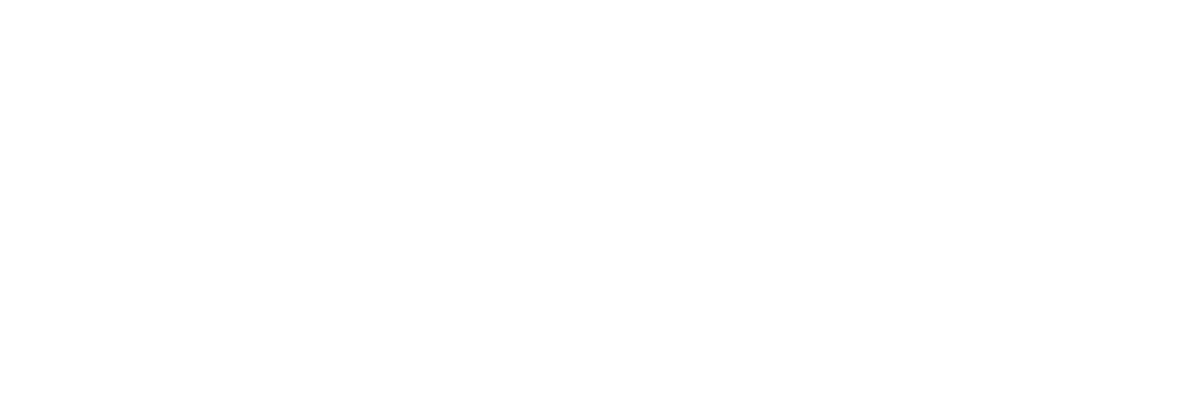

In [22]:
with open('tree.dot') as file:
    dot_graph=file.read()
img= graphviz.Source(dot_graph)
! dot-Tpng tree.dot -o tree.png

fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(mpimg.imread('tree.png'));

In [ ]:
tree.feature_importances_

In [ ]:
n_features= data.data.shape[1]
plt.figure(figsize=(15,8))
plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features),data.feature_names);

In [27]:
ram_price= pd.read_csv('ram_price.csv')

In [31]:
ram_price.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


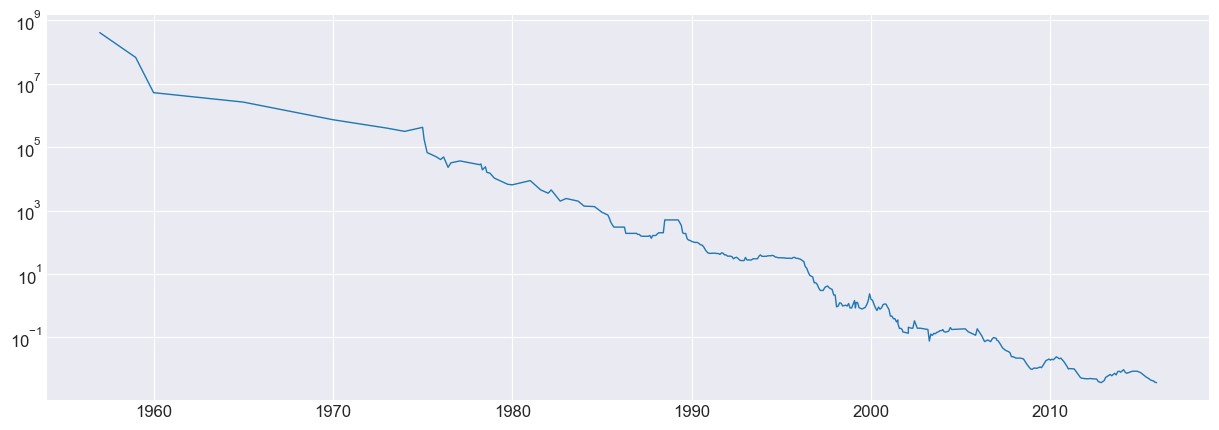

In [33]:
fig, ax= plt.subplots()

ax.semilogy(ram_price.date, ram_price.price)

In [43]:
data_train = ram_price[ram_price.date <2000].copy()
data_test= ram_price[ram_price.date >=2000].copy()

X_train= data_train.date.to_numpy()[:, np.newaxis]
y_train= np.log(data_train.price.to_numpy())
tree= DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)
clf= LinearRegression().fit(X_train, y_train)
X_all = ram_price.date.to_numpy()[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr= clf.predict(X_all)
price_tree = np.exp(pred_tree)
price_lr= np.exp(pred_lr)

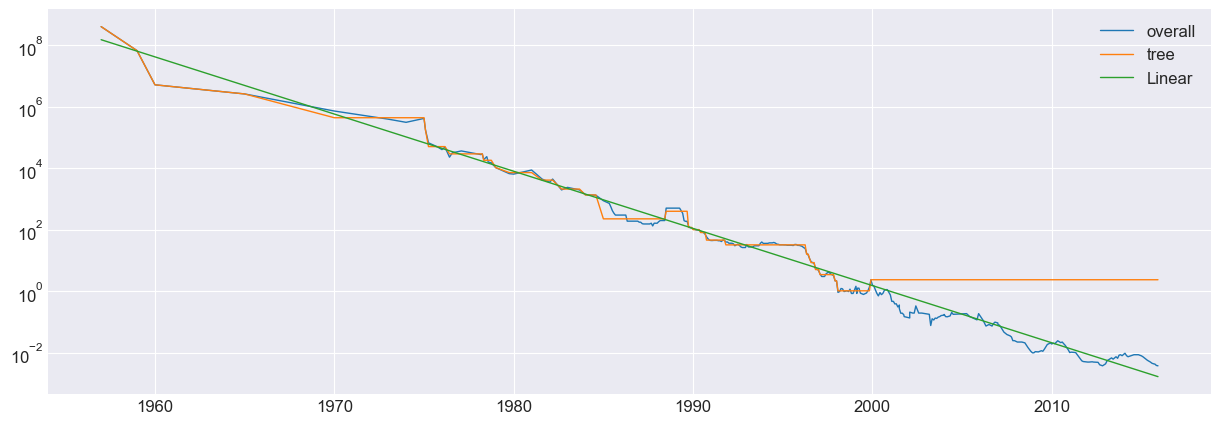

In [51]:
fig, ax = plt.subplots()

ax.semilogy(ram_price.date, ram_price.price, label='overall');
ax.semilogy(ram_price.date, price_tree, label='tree');
ax.semilogy(ram_price.date, price_lr, label='Linear');

plt.legend()